In [1]:
from src import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [ ]:
DF = pd.read_csv('./data/task4.csv', index_col='timestamp', parse_dates=True)
DF = DF.apply(pd.to_numeric)

In [3]:
market = DF.iloc[1::2].reset_index(drop=True) - DF.iloc[::2].reset_index(drop=True)
market.index = DF.index[1::2].date
price = market['price'].cumsum()
df = DF.iloc[1::2]
df = df.drop(columns=['price'])
df.index = df.index.date
df['price'] = price
df

,0_long,1_long,2_short,3_short,4_long,5_long,6_long,7_long,8_long,9_short,...,258_long,259_long,260_long,261_long,262_short,263_short,264_short,265_short,naive_ave_pnl,price
2006-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
2006-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-4.00
2006-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.00
2006-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
2006-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1207.0,1799.0,8677.0,...,518.0,1970.0,3170.0,420.0,6349.0,4267.0,4169.0,8467.0,3266.097744,-495.50
2025-07-08,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1207.0,1817.0,8677.0,...,518.0,1988.0,3188.0,420.0,6349.0,4267.0,4169.0,8467.0,3267.518797,-491.00
2025-07-09,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1277.0,1887.0,8677.0,...,518.0,1988.0,3258.0,490.0,6349.0,4267.0,4169.0,8467.0,3270.413534,-473.50
2025-07-10,4993.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1277.0,1822.0,8677.0,...,518.0,1988.0,3193.0,425.0,6349.0,4267.0,4169.0,8467.0,3265.281955,-489.75


## Calculate Metrics

In [ ]:
metrics = calc_metrics(df)

In [ ]:
metrics1M = {}
for col, frame in metrics.items():
    frame.fillna(0, inplace=True)
    frame.index = pd.to_datetime(frame.index)
    frame.to_csv(f'./data/{col}.csv')
    metrics1M[col] = frame.resample('1M').last()

In [149]:
frame

,mdd_percent,ldd_percent,sharpe,cdd_percent,mdd_days,ldd_days,pnl_t,days_since_first_trade,drawdown_beta,drawup_beta,excess_mean_ret,excess_ret,cvar_5,success_rate
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.185083
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0,0.000000,0.000000,0.000000,4.000000,0.0,0.185083
2006-01-04,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0,0.000000,0.000000,0.000000,1.000000,0.0,0.185083
2006-01-05,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.185083
2006-01-06,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0,0.000000,0.000000,0.000000,-1.000000,0.0,0.185083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,0.053293,0.076544,11.574252,0.000000,65.0,250,11.586466,4855,-2.066971,3.937443,1.039148,3761.597744,0.0,0.185083
2025-07-08,0.053270,0.076511,11.574502,0.000000,65.0,250,1.421053,4856,-2.066437,3.937443,1.038383,3758.518797,0.0,0.185083
2025-07-09,0.053223,0.076443,11.574751,0.000000,65.0,250,2.894737,4857,-2.065772,3.937443,1.035490,3743.913534,0.0,0.185083
2025-07-10,0.053306,0.076563,11.575033,0.001572,65.0,250,-5.131579,4858,-2.065229,3.937443,1.036913,3755.031955,0.0,0.185083


## PCA defining weights

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [108]:
# normalize helper
def _normalize_weights(w: pd.Series):
    w = w.fillna(0.0)
    s = w.sum()
    return w if s==0 else (w/s)

def pca_metric_weights_relaxed(X: pd.DataFrame, ncomp=10):
    Xc = X.copy()

    # standardization
    scaler = StandardScaler()
    Z = scaler.fit_transform(Xc.values)
    pca = PCA(n_components=ncomp)
    pca.fit(Z)

    # calculate weights
    load = pd.DataFrame(pca.components_.T, index=Xc.columns)
    evr = pca.explained_variance_ratio_
    contrib = (load.abs().values @ evr.reshape(-1,1)).ravel()
    w_part = pd.Series(contrib, index=Xc.columns)

    # back to full 15 columns
    w = pd.Series(0.0, index=X.columns)
    w.loc[w_part.index] = w_part

    return _normalize_weights(w), load, evr

### time horizon

#### check eigenvalue

In [109]:
for sample in metrics1M.values():
    scaler = StandardScaler()
    Z = scaler.fit_transform(sample)
    cov = np.cov(Z, rowvar=False)
    
    # eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(cov)   
    eigvals = np.flip(eigvals)               
    eigvecs = np.flip(eigvecs, axis=1)
    print("Eigenvalues (manual):\n", eigvals.round(4))

Eigenvalues (manual):
 [6.1711e+00 2.6501e+00 1.0063e+00 9.3770e-01 7.0860e-01 2.4370e-01
 1.4640e-01 1.0410e-01 4.5300e-02 3.0700e-02 5.1000e-03 2.3000e-03
 0.0000e+00 0.0000e+00]
Eigenvalues (manual):
 [7.1398e+00 1.2952e+00 1.1599e+00 8.7590e-01 7.1830e-01 5.1010e-01
 1.9560e-01 7.9700e-02 3.9200e-02 2.4900e-02 7.7000e-03 4.9000e-03
 0.0000e+00 0.0000e+00]
Eigenvalues (manual):
 [7.0559e+00 2.7232e+00 1.0123e+00 9.8440e-01 5.6410e-01 2.6500e-01
 2.3120e-01 7.6800e-02 6.7200e-02 3.8500e-02 2.6100e-02 6.8000e-03
 4.1000e-03 0.0000e+00]
Eigenvalues (manual):
 [ 5.9922e+00  2.6058e+00  1.6642e+00  6.6350e-01  5.4440e-01  2.0410e-01
  1.6320e-01  1.5170e-01  3.4900e-02  1.5500e-02  6.1000e-03  5.6000e-03
  0.0000e+00 -0.0000e+00]
Eigenvalues (manual):
 [6.1476e+00 2.6135e+00 1.1732e+00 1.0851e+00 5.8970e-01 2.4960e-01
 1.1780e-01 3.6200e-02 2.1300e-02 9.4000e-03 6.4000e-03 1.4000e-03
 0.0000e+00 0.0000e+00]
Eigenvalues (manual):
 [5.3774e+00 2.3224e+00 1.4756e+00 9.8040e-01 8.8790e-01 8.

#### chose 12 as the number of components

In [112]:
pca_weight_time = 0
for sample in metrics1M.values():
    w_pca, loadings, evr = pca_metric_weights_relaxed(sample, ncomp=12)
    pca_weight_time += w_pca
pca_weight_time = pca_weight_time / len(metrics1M)
print("PCA weights:")
print(pca_weight_time.round(4))

PCA weights:
mdd_percent               0.0793
ldd_percent               0.0780
sharpe                    0.0866
cdd_percent               0.0766
mdd_days                  0.0861
ldd_days                  0.0873
pnl_t                     0.0479
days_since_first_trade    0.0851
drawdown_beta             0.0868
drawup_beta               0.0874
excess_mean_ret           0.0853
excess_ret                0.0899
cvar_5                    0.0236
success_rate              0.0000
dtype: float64


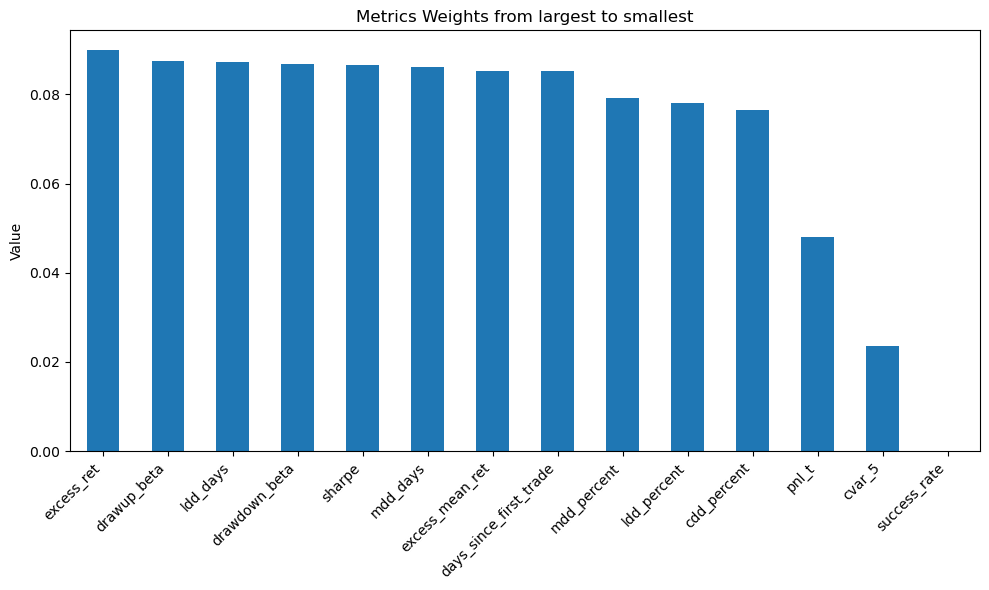

In [114]:
s = pca_weight_time  
s_sorted = s.sort_values(ascending=False)

plt.figure(figsize=(10,6))
s_sorted.plot(kind='bar')
plt.ylabel('Value')
plt.title('Metrics Weights from largest to smallest')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### trader horizon

In [116]:
# get re-arrange dict
time_hor = metrics1M['0_long'].index

metrics_traders = {}
for t in time_hor:
    records = {}
    for trader, df1 in metrics1M.items():
        records[trader] = df1.loc[t]
    metrics_traders[t] = pd.DataFrame.from_dict(records, orient='index')

#### check eigenvalue

In [133]:
count = 100
for sample in metrics_traders.values():
    if count > 0:
        count -= 1
        continue
    scaler = StandardScaler()
    Z = scaler.fit_transform(sample)
    cov = np.cov(Z, rowvar=False)
    
    # eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(cov)   
    eigvals = np.flip(eigvals)               
    eigvecs = np.flip(eigvecs, axis=1)
    print("Eigenvalues (manual):\n", eigvals.round(4))

Eigenvalues (manual):
 [4.5966 2.0832 1.6983 1.5298 1.027  0.6799 0.5732 0.5052 0.4504 0.3748
 0.2504 0.1341 0.0879 0.0618]
Eigenvalues (manual):
 [ 3.9941  2.6163  1.4452  1.3086  1.0475  0.6785  0.5225  0.3806  0.3425
  0.3042  0.2233  0.1288  0.0568 -0.    ]
Eigenvalues (manual):
 [ 4.0395  2.727   1.4188  1.1364  1.0584  0.6865  0.5258  0.3865  0.3522
  0.3088  0.216   0.133   0.0599 -0.    ]
Eigenvalues (manual):
 [4.1363 3.2342 1.4148 1.204  0.9904 0.7448 0.5512 0.4982 0.3771 0.3209
 0.2375 0.1693 0.1131 0.0608]
Eigenvalues (manual):
 [4.1204 3.1933 1.3477 1.0074 0.9161 0.6715 0.5367 0.358  0.3378 0.228
 0.1579 0.1137 0.0603 0.    ]
Eigenvalues (manual):
 [ 4.1483  2.779   1.2821  1.0758  0.9313  0.6467  0.5888  0.4424  0.3849
  0.3375  0.2199  0.1457  0.0664 -0.    ]
Eigenvalues (manual):
 [4.3244 3.0202 1.291  0.9363 0.9025 0.5981 0.5466 0.4053 0.3449 0.2527
 0.217  0.147  0.0629 0.    ]
Eigenvalues (manual):
 [4.2301 2.6675 1.6361 1.1252 0.9783 0.6963 0.6187 0.5613 0.4038 0.38

#### chose 14 as the number of components

In [119]:
pca_weight_traders = 0
for sample in metrics_traders.values():
    w_pca, loadings, evr = pca_metric_weights_relaxed(sample, ncomp=14)
    pca_weight_traders += w_pca
pca_weight_traders = pca_weight_traders / len(metrics_traders)
print("PCA weights:")
print(pca_weight_traders.round(4))

PCA weights:
mdd_percent               0.0476
ldd_percent               0.0480
sharpe                    0.0531
cdd_percent               0.0486
mdd_days                  0.0535
ldd_days                  0.0524
pnl_t                     0.0241
days_since_first_trade    0.0505
drawdown_beta             0.0504
drawup_beta               0.0503
excess_mean_ret           0.0529
excess_ret                0.1649
cvar_5                    0.1556
success_rate              0.1483
dtype: float64


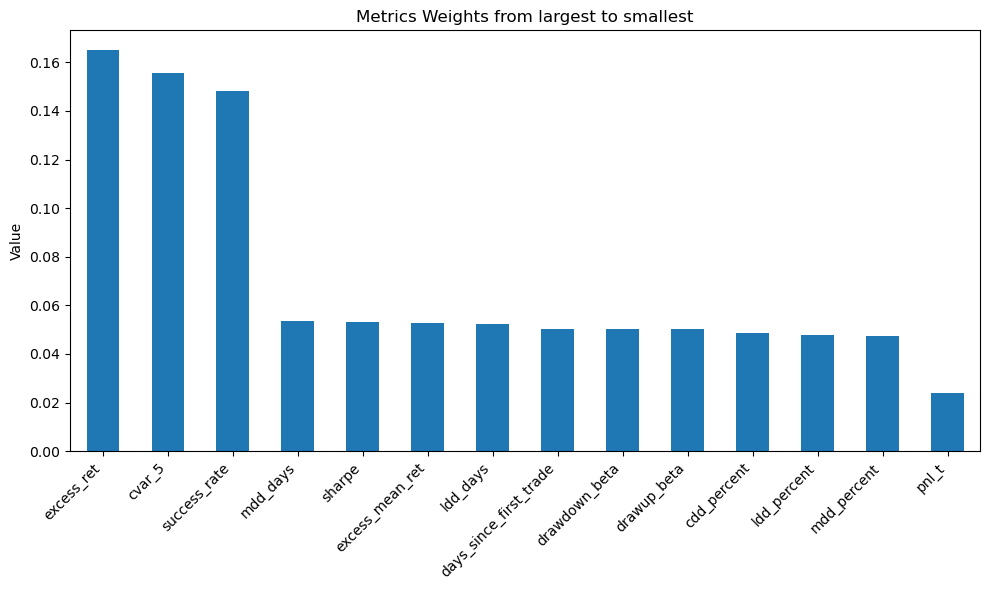

In [120]:
s = pca_weight_traders  
s_sorted = s.sort_values(ascending=False)

plt.figure(figsize=(10,6))
s_sorted.plot(kind='bar')
plt.ylabel('Value')
plt.title('Metrics Weights from largest to smallest')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## Construct EI

In [125]:
EI_time = compute_EI_time(metrics1M, alpha=0.05, weights = pca_weight_time)
EI_trader = compute_EI_time(metrics_traders, alpha=0.05, weights = pca_weight_traders).T

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/2865655250.py:225: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-measures))


In [131]:
EI_time_AUC  = EI_time.sum(axis=0)
EI_trader_AUC = EI_trader.sum(axis=0)

In [151]:
df2 = df.copy()
df2.index = pd.to_datetime(df2.index)
df2 = df2.resample('1M').last()

new_weights_time = EI_time[EI_time.columns.difference(['naive_ave_pnl'])].copy()
new_weights_time = new_weights_time.div(new_weights_time.sum(axis = 1), axis = 0)

new_weights_trader = EI_trader[EI_trader.columns.difference(['naive_ave_pnl'])].copy()
new_weights_trader = new_weights_trader.div(new_weights_trader.sum(axis = 1), axis = 0)

simple_rankings_time = df2[df2.columns.difference(['price', 'naive_ave_pnl'])].mul(new_weights_time)
simple_rankings_time_pnl = simple_rankings_time.sum(axis=1)

simple_rankings_trader = df2[df2.columns.difference(['price', 'naive_ave_pnl'])].mul(new_weights_trader)
simple_rankings_trader_pnl = simple_rankings_trader.sum(axis=1)

sharpe_naive = sharpe_ratio(df2['naive_ave_pnl'])[-1]
sharpe_simple_time = sharpe_ratio(simple_rankings_time_pnl)[-1]
sharpe_simple_trader = sharpe_ratio(simple_rankings_trader_pnl)[-1]
calmar_naive = calmar(df2['naive_ave_pnl'])[-1]
calmar_simple_time = calmar(simple_rankings_time_pnl)[-1]
calmar_simple_trader = calmar(simple_rankings_trader_pnl)[-1]

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/3198351794.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = df2.resample('1M').last()
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/4239518982.py:60: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))


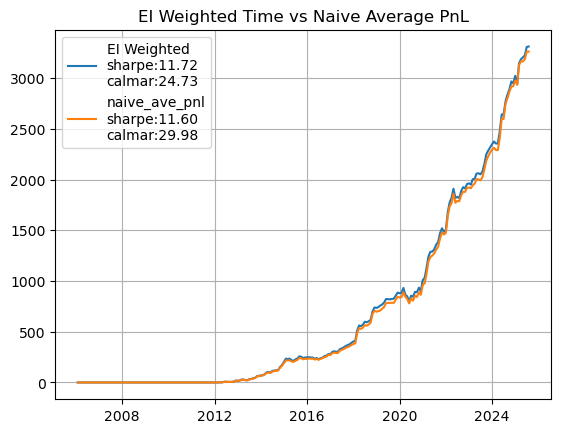

In [157]:
plt.plot(simple_rankings_time.index, simple_rankings_time_pnl, label = 'EI Weighted\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe_simple_time, calmar_simple_time))
plt.plot(df2.index, df2['naive_ave_pnl'], label = 'naive_ave_pnl\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe_naive, calmar_naive))
plt.legend()
plt.title('EI Weighted Time vs Naive Average PnL')
plt.grid()
plt.show()

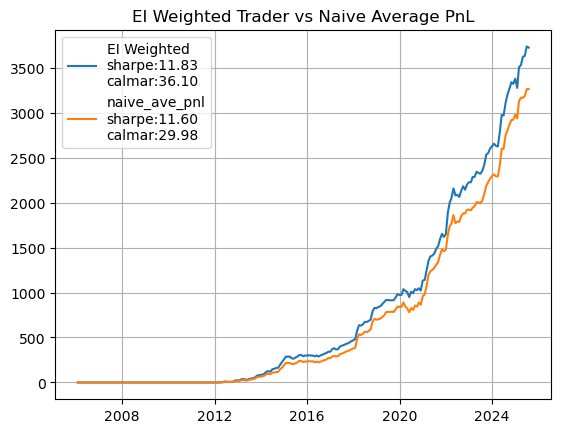

In [158]:
plt.plot(simple_rankings_trader.index, simple_rankings_trader_pnl, label = 'EI Weighted\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe_simple_trader, calmar_simple_trader))
plt.plot(df2.index, df2['naive_ave_pnl'], label = 'naive_ave_pnl\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe_naive, calmar_naive))
plt.legend()
plt.title('EI Weighted Trader vs Naive Average PnL')
plt.grid()
plt.show()

## PnL Clusters

In [176]:
clustering = df2.copy()
clustering.drop(columns=['price', 'naive_ave_pnl'], inplace=True)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [177]:
X = clustering.T.values  # shape = (200+, T)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [178]:
c0 = clustering.iloc[:, labels == 0]
c0_cols = c0.columns
c1 = clustering.iloc[:, labels == 1]
c1_cols = c1.columns
c2 = clustering.iloc[:, labels == 2]
c2_cols = c2.columns
c3 = clustering.iloc[:, labels == 3]
c3_cols = c3.columns

In [235]:
print('c0:', c0_cols, len(c0_cols))
print('c1:', c1_cols, len(c1_cols))
print('c3:', c3_cols, len(c3_cols))
print('c2:', c2_cols, len(c2_cols))

c0: Index(['0_long', '1_long', '14_long', '21_long', '22_short', '31_short',
       '44_short', '45_short', '60_short', '62_long', '65_short', '68_long',
       '69_long', '71_short', '76_short', '86_short', '92_short', '96_short',
       '101_short', '108_short', '111_short', '113_long', '117_long',
       '123_short', '124_short', '125_short', '127_long', '129_short',
       '137_short', '144_long', '146_long', '166_short', '170_short',
       '171_short', '177_long', '184_long', '197_short', '198_short',
       '204_long', '208_long', '210_short', '218_long', '232_short',
       '240_long', '252_long', '257_long', '263_short'],
      dtype='object') 47
c1: Index(['2_short', '20_short', '30_short', '33_short', '34_short', '39_short',
       '81_short', '84_short', '88_short', '95_long', '133_short', '139_short',
       '145_short', '147_short', '148_short', '160_short', '174_short',
       '187_short', '189_short', '192_short', '199_short', '265_short'],
      dtype='object') 22
c3: 

#### average EI curve

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/4239893846.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [EI_trader[c0_cols].mean(axis=1)[-1], EI_trader[c1_cols].mean(axis=1)[-1], EI_trader[c2_cols].mean(axis=1)[-1], EI_trader[c3_cols].mean(axis=1)[-1]]
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/4239893846.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [EI_trader[c0_cols].mean(axis=1)[-1], EI_trader[c1_cols].mean(axis=1)[-1], EI_trader[c2_cols].mean(axis=1)[-1], EI_trader[c3_cols].mean(axis=1)[-1]]
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/

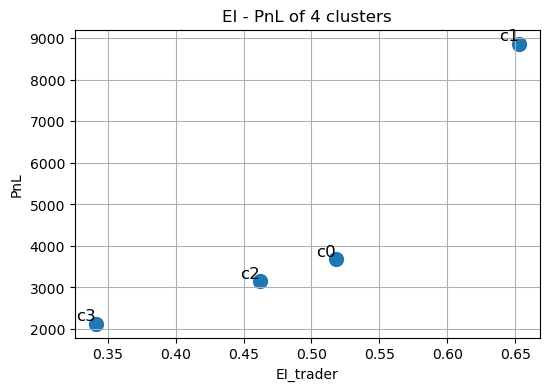

In [236]:
x = [EI_trader[c0_cols].mean(axis=1)[-1], EI_trader[c1_cols].mean(axis=1)[-1], EI_trader[c2_cols].mean(axis=1)[-1], EI_trader[c3_cols].mean(axis=1)[-1]]
y = [c0.mean(axis=1)[-1], c1.mean(axis=1)[-1], c2.mean(axis=1)[-1], c3.mean(axis=1)[-1]]
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=100) 
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi, yi, f'c{i}', fontsize=12, ha='right', va='bottom')

plt.xlabel('EI_trader')
plt.ylabel('PnL')
plt.title('EI - PnL of 4 clusters')
plt.grid(True)
plt.show()

In [237]:
x, y

([np.float64(0.5177036508148083),
  np.float64(0.6525274613453323),
  np.float64(0.46200677976271337),
  np.float64(0.3412826979359731)],
 [np.float64(3674.8936170212764),
  np.float64(8867.954545454546),
  np.float64(3155.5641025641025),
  np.float64(2130.235294117647)])

/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/3531243450.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [c0.mean(axis=1)[-1], c1.mean(axis=1)[-1], c2.mean(axis=1)[-1], c3.mean(axis=1)[-1]]
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/3531243450.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [c0.mean(axis=1)[-1], c1.mean(axis=1)[-1], c2.mean(axis=1)[-1], c3.mean(axis=1)[-1]]
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/3531243450.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

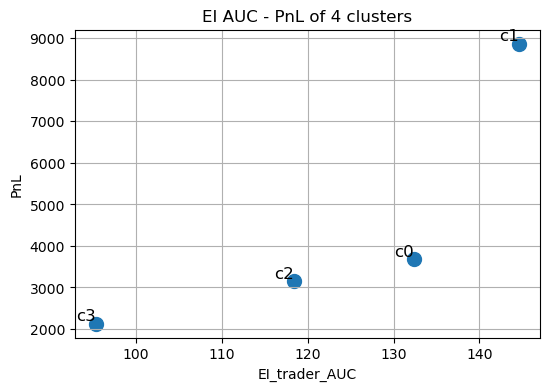

In [200]:
x = [EI_trader_AUC[c0_cols].mean(), EI_trader_AUC[c1_cols].mean(), EI_trader_AUC[c2_cols].mean(), EI_trader_AUC[c3_cols].mean()]
y = [c0.mean(axis=1)[-1], c1.mean(axis=1)[-1], c2.mean(axis=1)[-1], c3.mean(axis=1)[-1]]
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=100) 
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi, yi, f'c{i}', fontsize=12, ha='right', va='bottom')

plt.xlabel('EI_trader_AUC')
plt.ylabel('PnL')
plt.title('EI AUC - PnL of 4 clusters')
plt.grid(True)
plt.show()

#### mean plotting

In [ ]:
c0 = df.drop(columns = ['price', 'naive_ave_pnl']).iloc[:, labels == 0]
c1 = df.drop(columns = ['price', 'naive_ave_pnl']).iloc[:, labels == 1]
c2 = df.drop(columns = ['price', 'naive_ave_pnl']).iloc[:, labels == 2]
c3 = df.drop(columns = ['price', 'naive_ave_pnl']).iloc[:, labels == 3]


/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/4239518982.py:60: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/4239518982.py:60: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/4239518982.py:60: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))
/var/folders/x0/47gb5md96sdcz2ww8mdbxprh0000gn/T/ipykernel_8351/4239518982.py:60: RuntimeWarning: invalid value encountered in divide
  sharpe = np.where(rstd == 0, 0, rmean / rstd * np.sqrt(252))


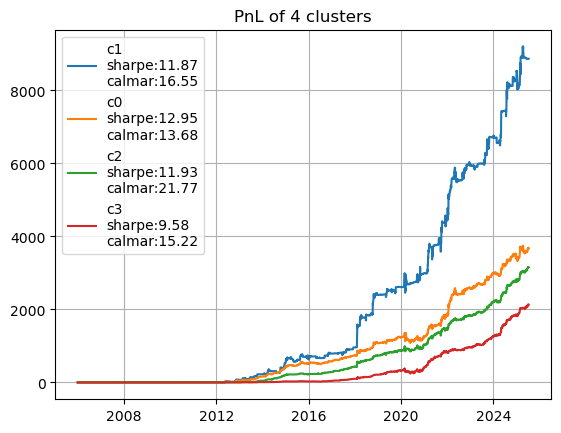

In [207]:
sharpe1 = sharpe_ratio(c1.mean(axis=1))[-1]
calmar1 = calmar(c1.mean(axis=1))[-1]
plt.plot(c1.mean(axis=1), label = 'c1\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe1, calmar1))

sharpe0 = sharpe_ratio(c0.mean(axis=1))[-1]
calmar0 = calmar(c0.mean(axis=1))[-1]
plt.plot(c0.mean(axis=1), label = 'c0\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe0, calmar0))

sharpe2 = sharpe_ratio(c2.mean(axis=1))[-1]
calmar2 = calmar(c2.mean(axis=1))[-1]
plt.plot(c2.mean(axis=1), label = 'c2\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe2, calmar2))

sharpe3 = sharpe_ratio(c3.mean(axis=1))[-1]
calmar3 = calmar(c3.mean(axis=1))[-1]
plt.plot(c3.mean(axis=1), label = 'c3\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe3, calmar3))

plt.legend()
plt.title('PnL of 4 clusters')
plt.grid()
plt.show()

#### consine similarity

In [228]:
from sklearn.metrics.pairwise import cosine_similarity

def cluster_cosine_analysis(pnl_curves: pd.DataFrame, labels: np.ndarray):
    """
    pnl_curves: DataFrame or ndarray of shape (n_samples, n_features)
    labels: array-like of shape (n_samples,)
    """
    clusters = np.unique(labels)
    sim_within = {}
    sim_between = pd.DataFrame(index=clusters, columns=clusters)

    X = pnl_curves.values.T
    sim_matrix = cosine_similarity(X)

    for c in clusters:
        idx = np.where(labels == c)[0]
        if len(idx) > 1:
            sims = sim_matrix[np.ix_(idx, idx)]
            sim_within[c] = sims[np.triu_indices_from(sims, k=1)].mean()
        else:
            sim_within[c] = np.nan  

    for c1 in clusters:
        for c2 in clusters:
            idx1 = np.where(labels == c1)[0]
            idx2 = np.where(labels == c2)[0]
            sims = sim_matrix[np.ix_(idx1, idx2)]
            sim_between.loc[c1, c2] = sims.mean()

    return sim_within, sim_between

sim_within, sim_between = cluster_cosine_analysis(clustering, labels)

In [229]:
sim_within, sim_between

({np.int32(0): np.float64(0.9240541113080306),
  np.int32(1): np.float64(0.9751940058873085),
  np.int32(2): np.float64(0.8851551738953676),
  np.int32(3): np.float64(0.7603738940744112)},
           0         1         2         3
 0   0.92567  0.943399  0.903548  0.807931
 1  0.943399  0.976322  0.924251  0.846259
 2  0.903548  0.924251  0.886628  0.797076
 3  0.807931  0.846259  0.797076  0.762388)

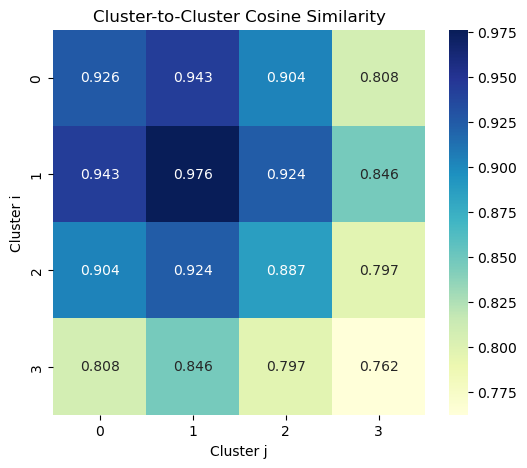

In [230]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(sim_between.astype(float), annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Cluster-to-Cluster Cosine Similarity")
plt.xlabel("Cluster j")
plt.ylabel("Cluster i")
plt.show()